<a href="https://colab.research.google.com/github/mmgcorreia/cap-419/blob/main/Lista_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação de Bibliotecas

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

# Importar Imagens para o Google Colab
from google.colab import files

# Uso das exceções
gdal.UseExceptions()

# Verificar versão utilzada da Gdal
gdal.__version__

'2.2.3'

## Exercício 01

Faça o download de um recorte da imagem Landsat-8 (LO82190762017351CUB00_B123456789_crop.tif). 

A imagem possui 9 bandas, nesta ordem:

    1. coastal

    2. blue

    3. green

    4. red

    5. nir

    6. swir1

    7. swir2

    8. pan

    9. cirrus

In [2]:
# Fazer o Upload da imagem a ser utilizada
uploaded = files.upload()

# Abrir o arquivo GeoTIFF
dataset = None
dataset = gdal.Open("LO82190762017351CUB00_B123456789_crop.tif", gdal.GA_ReadOnly)

# Verificando o tipo do dataset
type(dataset)

Saving LO82190762017351CUB00_B123456789_crop.tif to LO82190762017351CUB00_B123456789_crop.tif


osgeo.gdal.Dataset

In [3]:
# Criação dos objetos das bandas

banda_coastal = dataset.GetRasterBand(1)
banda_blue = dataset.GetRasterBand(2)
banda_green = dataset.GetRasterBand(3)
banda_red = dataset.GetRasterBand(4)
banda_nir = dataset.GetRasterBand(5)
banda_swir1 = dataset.GetRasterBand(6)
banda_swir2 = dataset.GetRasterBand(7)
banda_pan = dataset.GetRasterBand(8)
banda_cirrus = dataset.GetRasterBand(9)

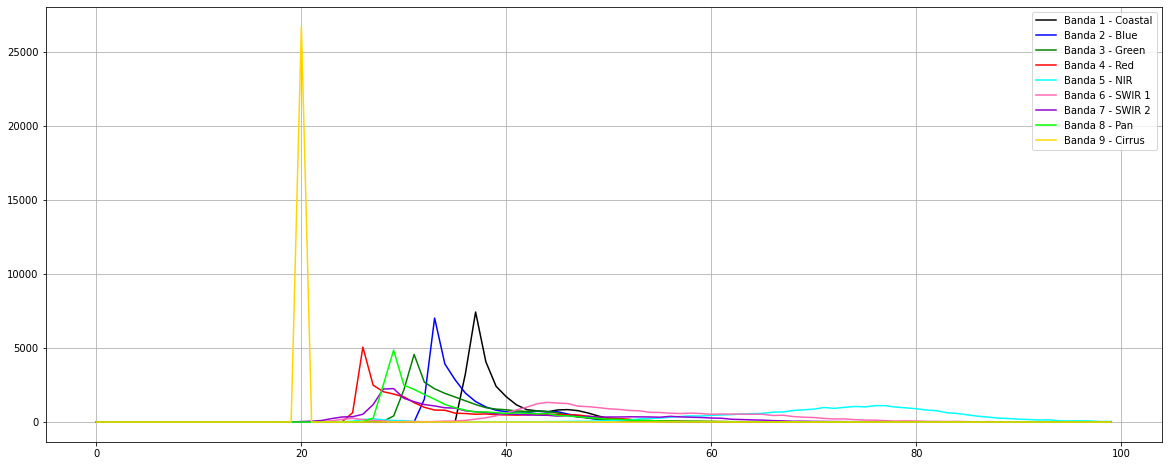

In [4]:
# A função GetHistogram precisa de intervalos
# mínimos e máximos de pixels para cada banda (min/max)
# e também a informação de divisões do gráfico (buckets)
plt.figure(figsize=(20, 8))
plt.plot(banda_coastal.GetHistogram(min=0, max=25000, buckets=100), 'black', label='Banda 1 - Coastal')
plt.plot(banda_blue.GetHistogram(min=0, max=25000, buckets=100), 'b', label='Banda 2 - Blue')
plt.plot(banda_green.GetHistogram(min=0, max=25000, buckets=100), 'g', label='Banda 3 - Green')
plt.plot(banda_red.GetHistogram(min=0, max=25000, buckets=100), 'r', label='Banda 4 - Red')
plt.plot(banda_nir.GetHistogram(min=0, max=25000, buckets=100), 'cyan', label='Banda 5 - NIR')
plt.plot(banda_swir1.GetHistogram(min=0, max=25000, buckets=100), 'hotpink', label='Banda 6 - SWIR 1')
plt.plot(banda_swir2.GetHistogram(min=0, max=25000, buckets=100), 'darkviolet', label='Banda 7 - SWIR 2')
plt.plot(banda_pan.GetHistogram(min=0, max=25000, buckets=100), 'lime', label='Banda 8 - Pan')
plt.plot(banda_cirrus.GetHistogram(min=0, max=25000, buckets=100), 'gold', label='Banda 9 - Cirrus')
plt.grid()
plt.legend()

In [5]:
# Utilizaremos o método do Numpy, ReadAsArray, para obter os dados das bandas no formato de uma matriz

matriz_red = banda_red.ReadAsArray()
matriz_nir = banda_nir.ReadAsArray()
matriz_green = banda_green.ReadAsArray()
matriz_swir1 = banda_swir1.ReadAsArray()

### Parte 1

Calcule 3 índices espectrais (NDVI, NDWI e NDBI). O NDBI (Normalized Difference Built-up Index) gera um produto que ressalta áreas construídas, e tem a seguinte fórmula:

\\

$NDBI = \frac{(SWIR_1-NIR)}{(SWIR_1+NIR)}$

\\

Vale lembrar, as fórmulas para o NDWI e o NDVI:

\\

$NDWI = \frac{(X_{green}-X_{nir})}{(X_{green}+X_{nir})}$

\\

$NDVI = \frac{(X_{nir}-X_{red})}{(X_{nir}+X_{red})}$

In [6]:
# NDVI

matriz_ndvi = (matriz_nir - matriz_red)/(matriz_nir + matriz_red)

## Mostrar as dimensoes e tipo de dado da matriz de saida
print(matriz_ndvi.shape)
print(matriz_ndvi.dtype)

(848, 891)
float64


In [7]:
# NDWI

matriz_ndwi = (matriz_green - matriz_nir)/(matriz_green + matriz_nir)

## Mostrar as dimensoes e tipo de dado da matriz de saida
print(matriz_ndwi.shape)
print(matriz_ndwi.dtype)

(848, 891)
float64


In [8]:
# NDBI

matriz_ndbi = (matriz_swir1 - matriz_nir)/(matriz_swir1 + matriz_nir)

## Mostrar as dimensoes e tipo de dado da matriz de saida
print(matriz_ndbi.shape)
print(matriz_ndbi.dtype)

(848, 891)
float64


### Parte 2

Crie um plot com 1 linha e 3 colunas, apresentando as imagens dos 3 índices calculados.

#### NDVI

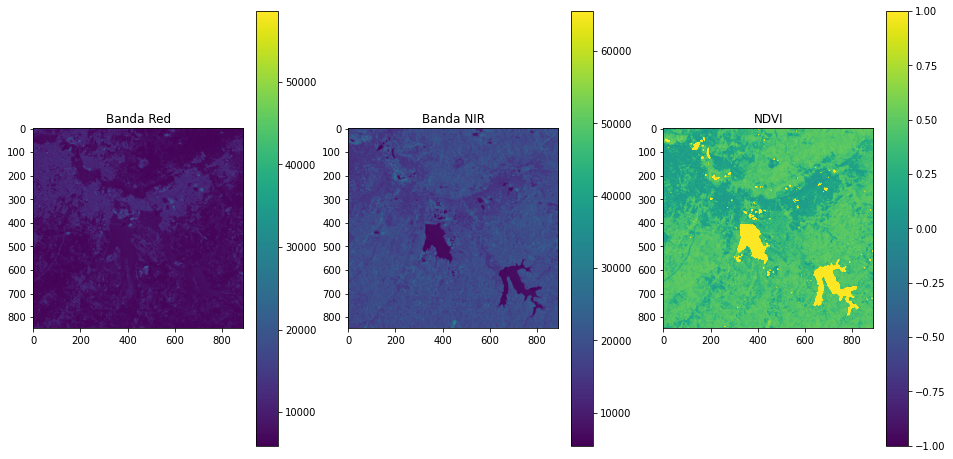

In [92]:
plt.figure(figsize=(16, 8))

plt.subplot(131)
plt.title("Banda Red")
plt.imshow(matriz_red, cmap = 'viridis')
plt.colorbar()

plt.subplot(132)
plt.title("Banda NIR")
plt.imshow(matriz_nir, cmap = 'viridis')
plt.colorbar()

plt.subplot(133)
plt.title("NDVI")
plt.imshow(matriz_ndvi, cmap = 'viridis', vmin=-1.0, vmax=1.0)
plt.colorbar()

#### NDWI

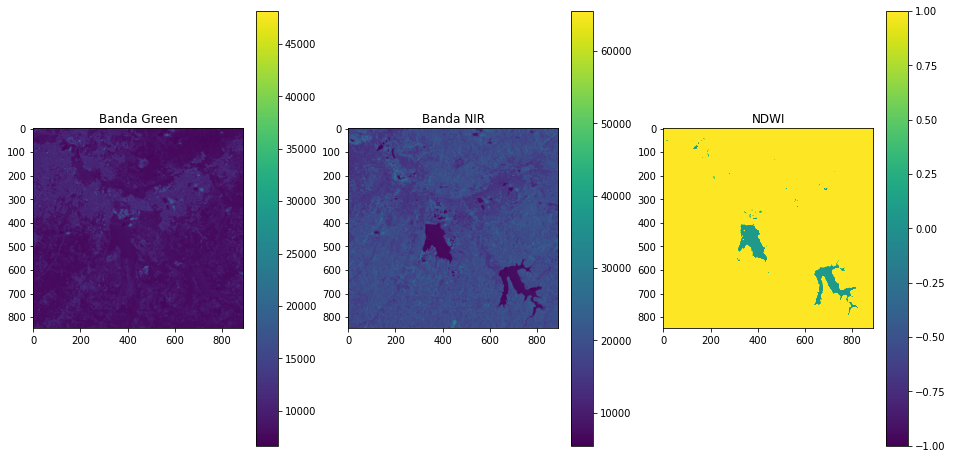

In [91]:
plt.figure(figsize=(16, 8))

plt.subplot(131)
plt.title("Banda Green")
plt.imshow(matriz_green, cmap = 'viridis')
plt.colorbar()

plt.subplot(132)
plt.title("Banda NIR")
plt.imshow(matriz_nir, cmap = 'viridis')
plt.colorbar()

plt.subplot(133)
plt.title("NDWI")
plt.imshow(matriz_ndwi, cmap = 'viridis', vmin=-1.0, vmax=1.0)
plt.colorbar()

#### NDBI

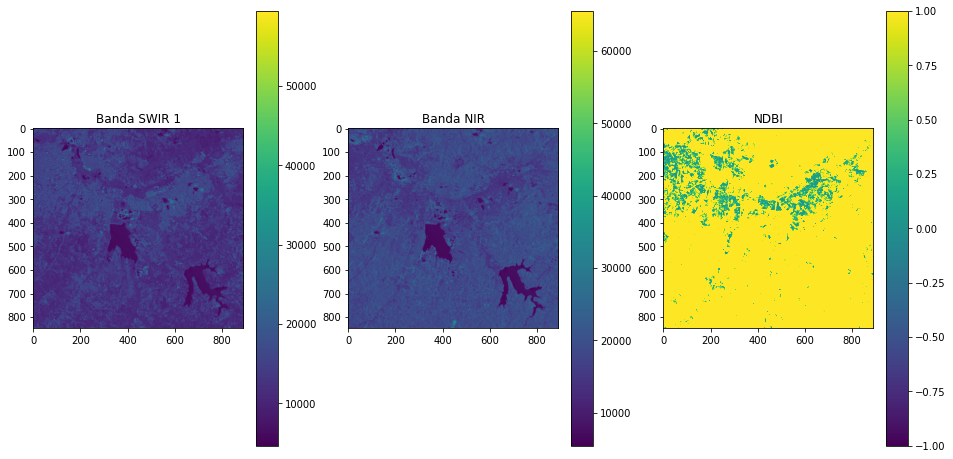

In [88]:
plt.figure(figsize=(16, 8))

plt.subplot(131)
plt.title("Banda SWIR 1")
plt.imshow(matriz_swir1, cmap = 'viridis')
plt.colorbar()

plt.subplot(132)
plt.title("Banda NIR")
plt.imshow(matriz_nir, cmap = 'viridis')
plt.colorbar()

plt.subplot(133)
plt.title("NDBI")
plt.imshow(matriz_ndbi, cmap = 'viridis', vmin=-1.0, vmax=1.0)
plt.colorbar()

### Parte 3

Mostre os valores mínimos e máximos de cada uma das 9 bandas da imagem.

In [12]:
# Imprimir informações de máximos/mínimos
# Valores dos pixels de cada banda
print('Coastal : ',banda_coastal.ComputeRasterMinMax())
print('Blue \t: ',banda_blue.ComputeRasterMinMax())
print('Green \t: ',banda_green.ComputeRasterMinMax())
print('Red \t: ',banda_red.ComputeRasterMinMax())
print('NIR \t: ',banda_nir.ComputeRasterMinMax())
print('SWIR 1 \t: ',banda_swir1.ComputeRasterMinMax())
print('SWIR 2 \t: ',banda_swir2.ComputeRasterMinMax())
print('Pan \t: ',banda_pan.ComputeRasterMinMax())
print('Cirrus \t: ',banda_cirrus.ComputeRasterMinMax())

Coastal :  (8788.0, 54603.0)
Blue 	:  (7792.0, 51790.0)
Green 	:  (6649.0, 48156.0)
Red 	:  (5930.0, 58561.0)
NIR 	:  (5409.0, 65535.0)
SWIR 1 	:  (4632.0, 59482.0)
SWIR 2 	:  (4865.0, 55323.0)
Pan 	:  (6347.0, 64926.0)
Cirrus 	:  (4895.0, 11059.0)


## Exercício 02

Dadas 2 imagens pancromáticas da mesma região, registradas, com diferença temporal de aproximadamente 3 anos, realize uma análise de mudança da cobertura do solo:

    CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif (imagem t1, Julho de 2015)

    CBERS_4_PAN5M_20180924_154_126_L4_BAND1_crop.tif (imagem t2, Setembro de 2018)

In [13]:
# Fazer o Upload da imagem a ser utilizada
uploaded1 = files.upload()
uploaded2 = files.upload()

# Abrir o arquivo GeoTIFF
dataset1 = None
dataset1 = gdal.Open("CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif", gdal.GA_ReadOnly)
dataset2 = None
dataset2 = gdal.Open("CBERS_4_PAN5M_20180924_154_126_L4_BAND1_crop.tif", gdal.GA_ReadOnly)

Saving CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif to CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif


Saving CBERS_4_PAN5M_20180924_154_126_L4_BAND1_crop.tif to CBERS_4_PAN5M_20180924_154_126_L4_BAND1_crop.tif


### Parte 1

Abra os arquivos das 2 imagens, utilizando a GDAL, e gere uma visualização de cada imagem e de seu histograma.

In [51]:
# Verificando o número de bandas em cada imagem

print(dataset1.RasterCount, dataset2.RasterCount)

1 1


In [22]:
# Criação dos objetos das bandas

imagemt1 = dataset1.GetRasterBand(1)
imagemt2 = dataset2.GetRasterBand(1)

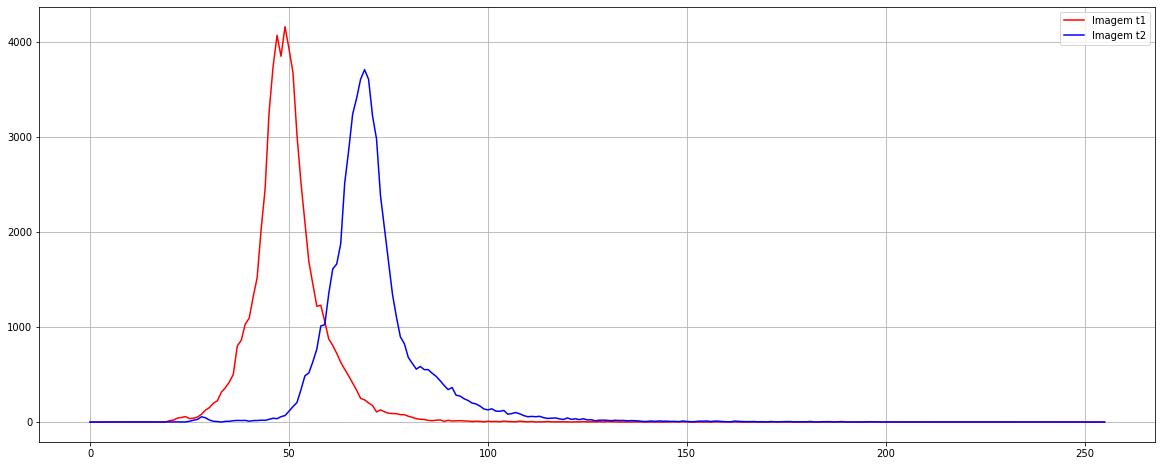

In [47]:
# A função GetHistogram precisa de intervalos
# mínimos e máximos de pixels para cada banda (min/max)
# e também a informação de divisões do gráfico (buckets)
plt.figure(figsize=(20, 8))
plt.plot(imagemt1.GetHistogram(), 'r', label='Imagem t1')
plt.plot(imagemt2.GetHistogram(), 'b', label='Imagem t2')
plt.grid()
plt.legend()

In [68]:
# Utilizaremos o método do Numpy, ReadAsArray, para obter os dados das bandas no formato de uma matriz

matriz_t1 = imagemt1.ReadAsArray()
matriz_t2 = imagemt2.ReadAsArray()

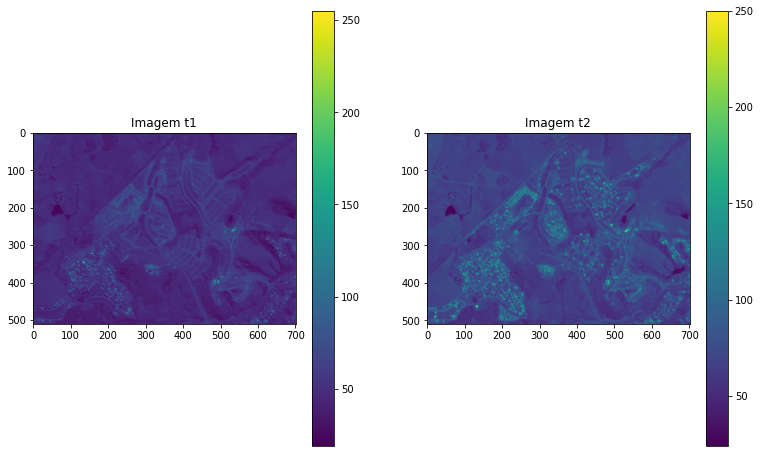

In [86]:
plt.figure(figsize=(20, 8))

plt.subplot(131)
plt.title("Imagem t1")
plt.imshow(matriz_t1, cmap = 'viridis')
plt.colorbar()

plt.subplot(132)
plt.title("Imagem t2")
plt.imshow(matriz_t2, cmap = 'viridis')
plt.colorbar()

### Parte 2

Crie uma nova matriz, delta = t2 - t1 , utilizando os operadores aritméticos da NumPy. Gere uma visualização desta matriz, e apresente um scatterplot contendo como eixos, as imagens t1 e t2.

In [74]:
# Gerando a matriz delta = t2 - t1

# Ajustando a matriz t1 para ter o mesmo tamanho que t2
ajust_t1 = matriz_t1[1:]

delta =  matriz_t2 - ajust_t1

Text(0, 0.5, 'Imagem t2')

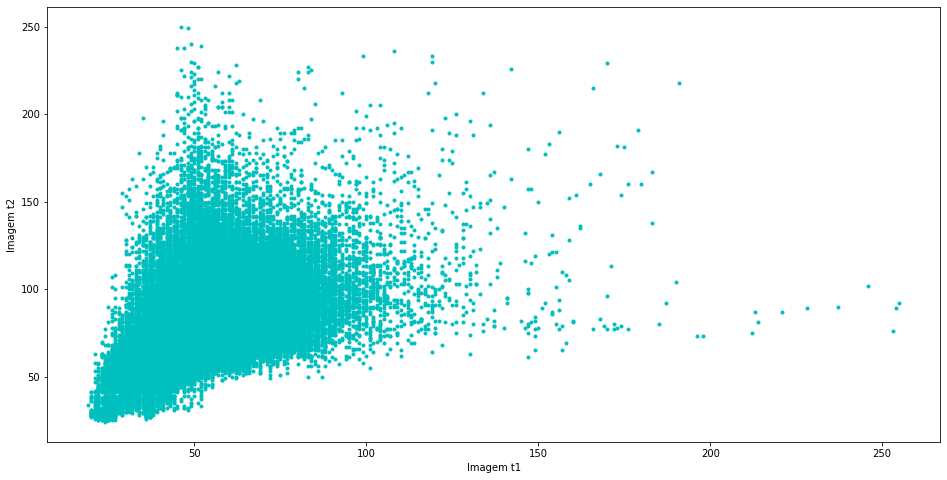

In [78]:
plt.figure(figsize = (16, 8))
plt.scatter(ajust_t1, matriz_t2, marker = '.', c = 'c')
plt.xlabel('Imagem t1')
plt.ylabel('Imagem t2')

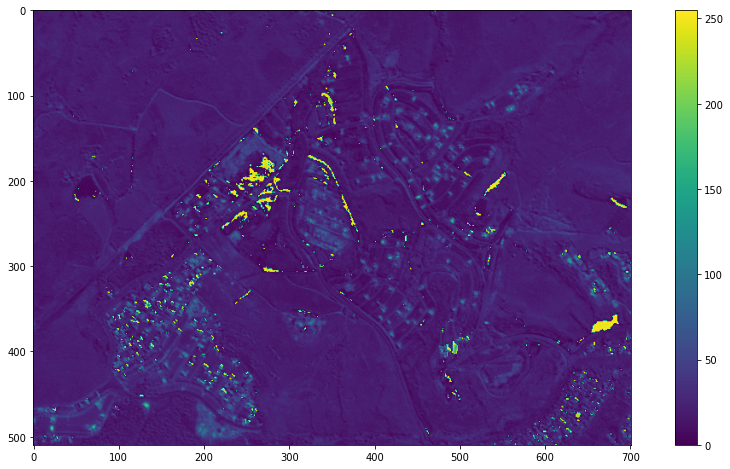

In [97]:
plt.figure(figsize = (16, 8))
plt.imshow(delta, cmap = 'viridis')
plt.colorbar()

### Parte 3

Verifique os limites mínimos e máximos da matriz resultante, e defina um intervalo de pixels que você considera como mudança e um intervalo que considera como não mudança. A partir destes intervalos, gere uma visualização de uma classificação de mudança e não mudança.

In [115]:
mod_A = delta.copy()
mod_B = delta.copy()

In [128]:
# Verificando dois possíveis intervalos de pixels, a mudança ocorrendo em 50 e em 100

mod_A[delta < 50] = 0
mod_A[delta >= 50] = 1

mod_B[delta < 100] = 0
mod_B[delta >= 100] = 1

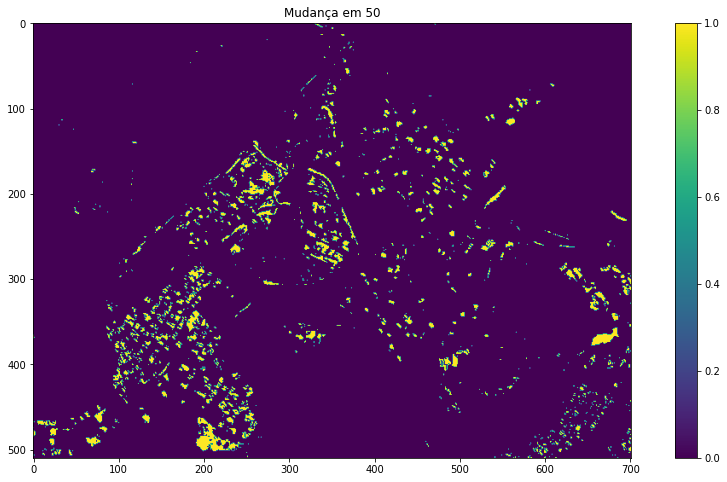

In [125]:
plt.figure(figsize = (16, 8))
plt.title("Mudança em 50")
plt.imshow(mod_A, cmap = 'viridis')
plt.colorbar()

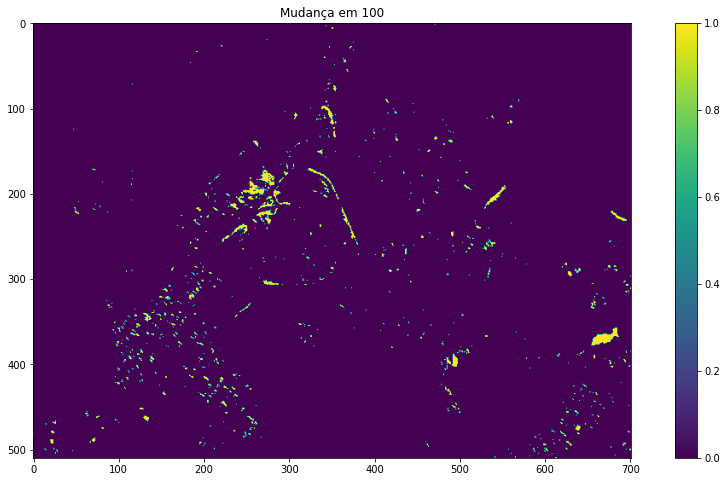

In [127]:
plt.figure(figsize = (16, 8))
plt.title("Mudança em 100")
plt.imshow(mod_B, cmap = 'viridis')
plt.colorbar()